This data was comprised of the following features:

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
#import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 250 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 250 

In [3]:
insurance= pd.read_csv(r'C:\Users\Aryan_Gupta\Downloads\loan_data.csv')

In [4]:
df= insurance.copy()
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
# Check the target variable
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [8]:
# #handling imbalanced dataset ---------------------
# not_fully_paid_0 = df[df['not.fully.paid'] == 0]
# not_fully_paid_1 = df[df['not.fully.paid'] == 1]

# print('not_fully_paid_0', not_fully_paid_0.shape)
# print('not_fully_paid_1', not_fully_paid_1.shape)

# #handling imbalanced data
# from sklearn.utils import resample
# df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
# df = pd.concat([not_fully_paid_0, df_minority_upsampled])

# from sklearn.utils import shuffle
# df = shuffle(df)

# #imbalanced data handled
# df['not.fully.paid'].value_counts()

In [9]:
n = len(pd.unique(df['purpose']))
print(n)

7


In [10]:
# Convert the categorical feature in the data set into a numerical feature
# le = preprocessing.LabelEncoder()
# df["purpose"] = le.fit_transform(df["purpose"].astype(str))
# df.head()

from sklearn import preprocessing

# Sample data
categories = df["purpose"].astype(str).tolist()

# Create a LabelEncoder instance
le = preprocessing.LabelEncoder()

# Fit and transform the data
df["purpose"] = le.fit_transform(categories)

# Access the mapping between categories and labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
print("Label Mapping:", label_mapping)

Label Mapping: {'all_other': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'major_purchase': 5, 'small_business': 6}


In [11]:
# Separate data to include numerical data only
num_data = df[["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", 
               "revol.util", "not.fully.paid"]]
num_data_features = num_data.columns

# Separate data to include categorical data only
cat_data = df[["credit.policy", "purpose", "inq.last.6mths", "delinq.2yrs", "pub.rec",  "not.fully.paid",]]
cat_data_features = cat_data.columns
cat_data_features

Index(['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'],
      dtype='object')

In [12]:
# Check the statistics of the numerical data
num_data.describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,0.160054
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,0.366676
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,0.000000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,0.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,1.000000


//The feature revol.bal (The borrower's revolving line utilization rate) has the highest standard deviation and so, it expected that this variable will contain outliers.

//Other features such as days.with.cr.line, installment, fico, and revol.util also show high standard deviations, as such, outliers in this data have to be detect and handled.

//The highest number of days the borrower has had a credit line (days.with.cr.line) was 17640 days.

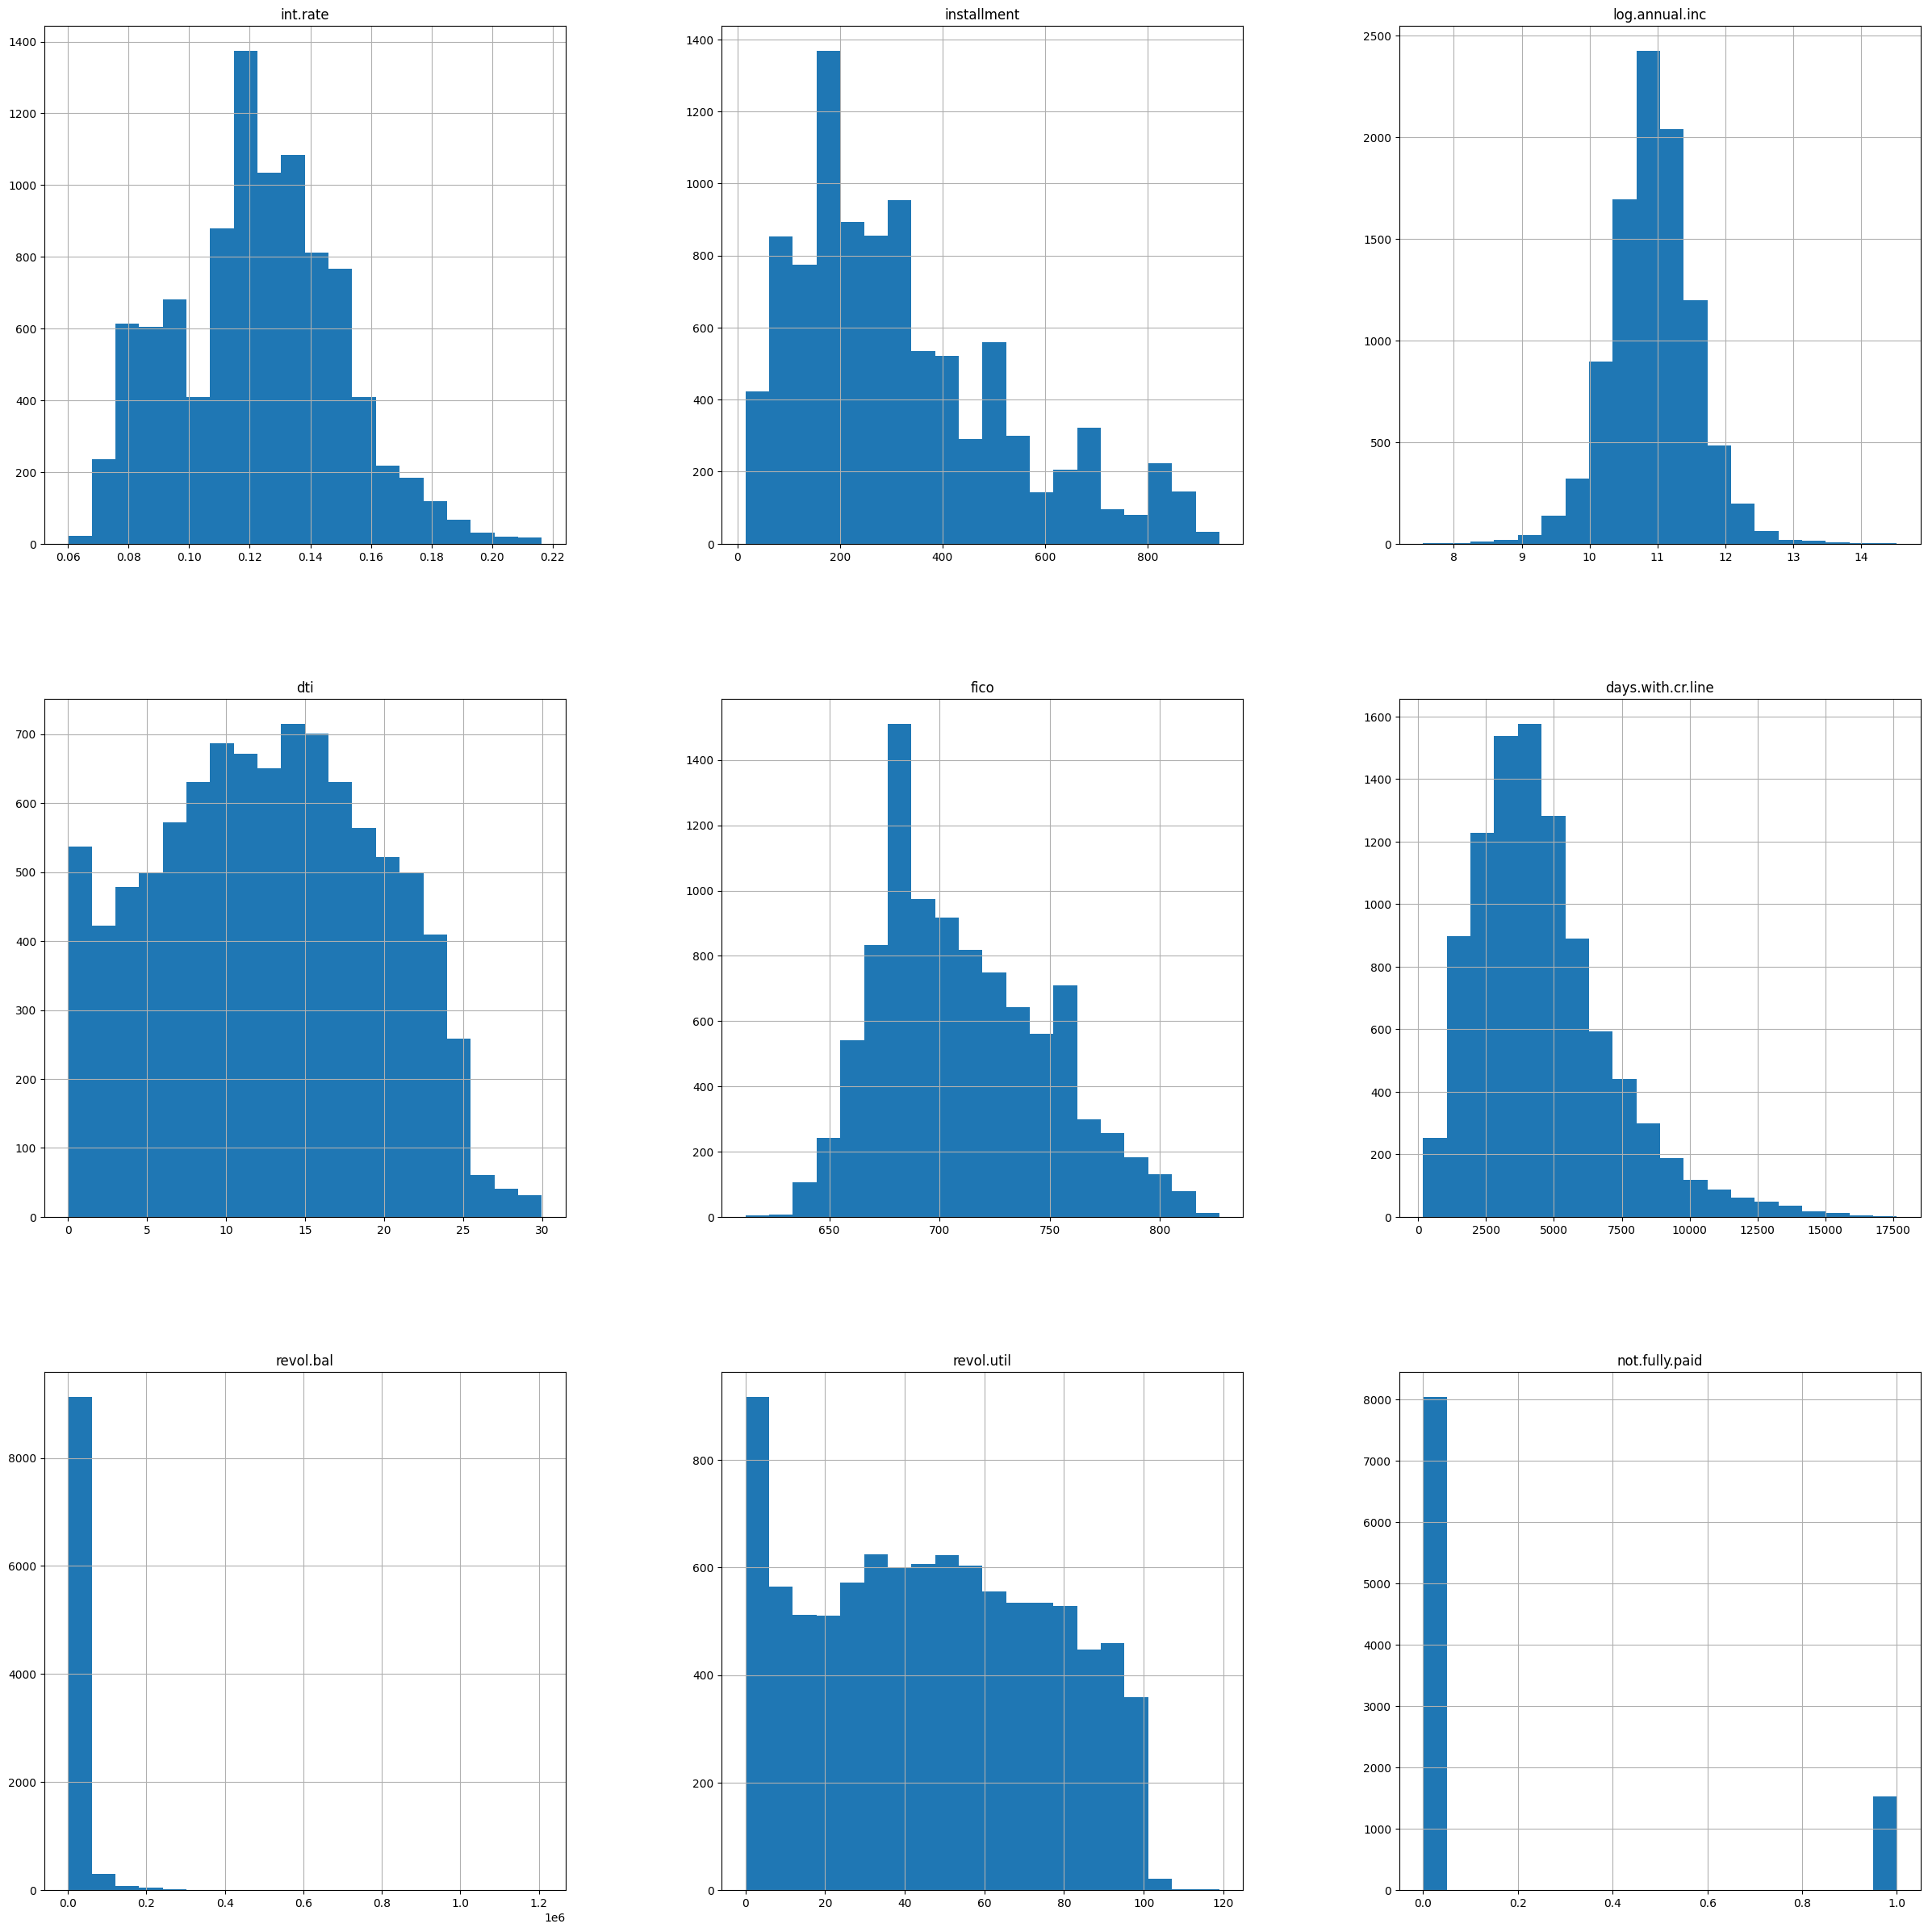

In [13]:
# Check the distribution of the numerical continous data
num_data.hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

In [14]:
cat_data.describe()

,credit.policy,purpose,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,33.000000,13.000000,5.000000,1.000000


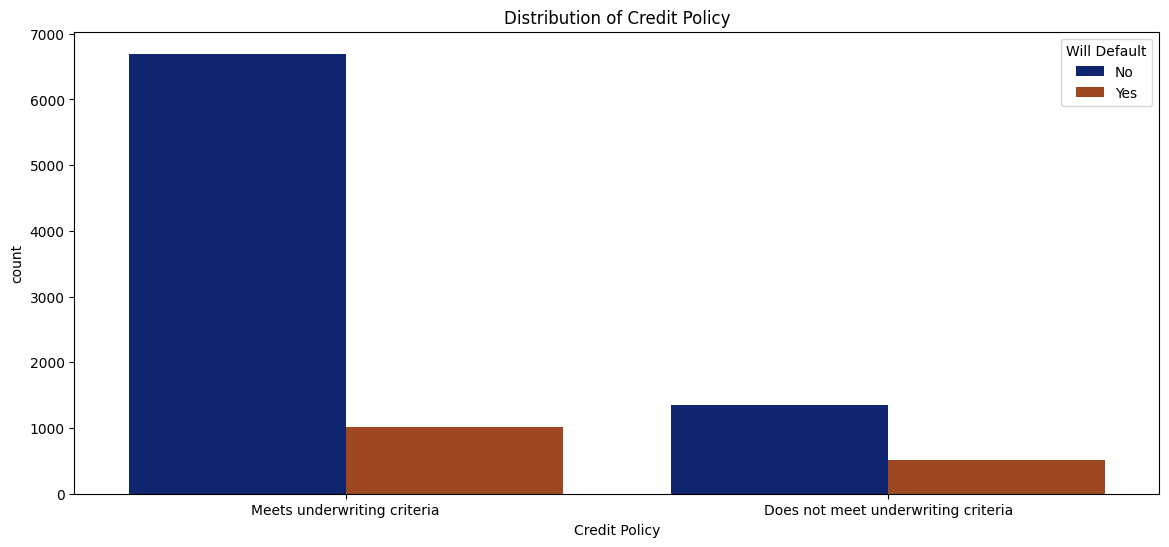

In [15]:
data_policy = insurance.copy()  
data_policy['Credit Policy'] = data_policy['credit.policy'].map({0: 'Does not meet underwriting criteria',
                                                                  1: 'Meets underwriting criteria'})
data_policy['Will Default'] = data_policy['not.fully.paid'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(14,6), dpi = 100)
sns.countplot(data = data_policy, x = 'Credit Policy', hue= 'Will Default', palette = 'dark')
plt.title('Distribution of Credit Policy')
plt.show()

In [16]:
# meets credit policy 
df[df["credit.policy"]==1]["not.fully.paid"].value_counts(normalize = True)*100

not.fully.paid
0    86.848249
1    13.151751
Name: proportion, dtype: float64

In [17]:
# does not meet credit policy
df[df["credit.policy"]==0]["not.fully.paid"].value_counts(normalize = True)*100

not.fully.paid
0    72.216274
1    27.783726
Name: proportion, dtype: float64

In [18]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<Figure size 1200x800 with 0 Axes>

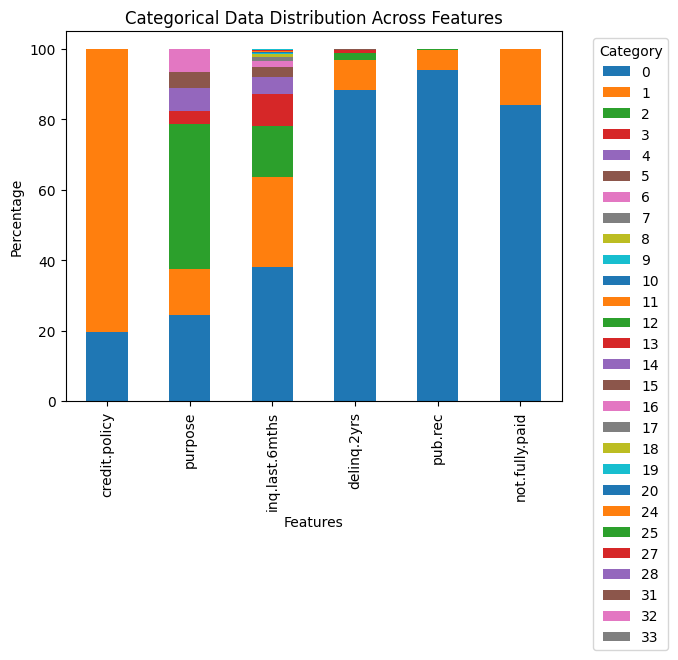

In [19]:
# Check the distribution of the categorical data

percentage_distributions = cat_data.apply(lambda x: x.value_counts(normalize=True) * 100)
# Plot the compiled view
plt.figure(figsize=(12, 8))
percentage_distributions.T.plot(kind='bar', stacked=True)
plt.title('Categorical Data Distribution Across Features')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
percentage_distributions

,credit.policy,purpose,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,19.503028,24.337022,37.972437,88.306536,94.163708,83.994571
1,80.496972,13.176028,25.704740,8.686573,5.564836,16.005429
2,NaN,41.313427,14.449781,2.004594,0.198371,NaN
3,NaN,3.581123,9.020672,0.678639,0.052203,NaN
4,NaN,6.567133,4.959282,0.198371,0.010441,NaN
5,NaN,4.562539,2.902485,0.062644,0.010441,NaN
6,NaN,6.462727,1.722698,0.020881,NaN,NaN
7,NaN,NaN,1.044059,0.010441,NaN,NaN
8,NaN,NaN,0.751723,0.010441,NaN,NaN
9,NaN,NaN,0.490708,NaN,NaN,NaN


In [21]:
df['inq.last.6mths'] = np.clip(df['inq.last.6mths'], a_min=None, a_max=5)
df['delinq.2yrs'] = np.clip(df['delinq.2yrs'], a_min=None, a_max=2)
df['pub.rec'] = np.clip(df['pub.rec'], a_min=None, a_max=1)

In [22]:
cat_data = df[["credit.policy", "purpose", "inq.last.6mths", "delinq.2yrs", "pub.rec",  "not.fully.paid",]]
percentage_distributions = cat_data.apply(lambda x: x.value_counts(normalize=True) * 100)
percentage_distributions

,credit.policy,purpose,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,19.503028,24.337022,37.972437,88.306536,94.163708,83.994571
1,80.496972,13.176028,25.704740,8.686573,5.836292,16.005429
2,NaN,41.313427,14.449781,3.006891,NaN,NaN
3,NaN,3.581123,9.020672,NaN,NaN,NaN
4,NaN,6.567133,4.959282,NaN,NaN,NaN
5,NaN,4.562539,7.893088,NaN,NaN,NaN
6,NaN,6.462727,NaN,NaN,NaN,NaN


Labels with less then 5% of observations can be termed as Rare Labels. This issue is often related to features having high cardinality — in other words, many different categories.

In [23]:
# Dataframe to store data replaced by corresponding WoE values
global_woe_df = pd.DataFrame()

# Dictionary to store IV values of features
global_iv={}

# Dataframe to map bins to woe
df_bin_to_woe = pd.DataFrame(columns = ['features','bin','WoE'])

In [67]:
# function to calculate WoE of categoriacal features

# good_bad_df is df containing only label/target variable 
def woe_categorical(df, cat_feature, good_bad_df):
    # concatenating cat_feature values and label 
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    
    # Create a DataFrame with feature values and corresponding bins, coloumn name is bin and values are same as cat_feature values of df 
    bin_df = pd.DataFrame({'bin': df[cat_feature]})
    
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    # resuting df: <cat_f> <count> <cat_f> <label_mean>
    # count is number of tuples lying in the category
    # here the categorical feature is grouped so only unique values in cat_f col
    
    # selecting relevant cols and renaming them
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    # df['diff_prop_good'] = df['prop_good'].diff().abs()
    # df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    bin_df = pd.merge(bin_df, df[[cat_feature, 'WoE']], left_on='bin', right_on=cat_feature, how='left')
    
    # Replace 'bin' values with corresponding 'WoE' values
    bin_df['bin'] = bin_df['WoE']
    
    # Dataframe to replace data with WoE values
    bin_df = bin_df.drop([cat_feature, 'WoE'], axis=1)
    global global_woe_df
    global_woe_df[cat_feature]= bin_df['bin']
    
    # Dataframe to store IV values 
    global global_iv
    global_iv[cat_feature]= df['IV'].values[0]
    
    # Dataframe to map bins to woe
    global df_bin_to_woe
    df['features']= cat_feature
    df['bin']= df[cat_feature]
    
    df1= df[['features','bin','WoE']]
    df_bin_to_woe = pd.concat([df_bin_to_woe, df1])
    df = df.drop(['features', 'bin'], axis=1)


    return df


In [25]:
# function for manual binning
def woe_manual_bins(df, cat_feature, good_bad_df, manual_bins):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    
    # Bin data based on manual bins
    bins = pd.cut(df[cat_feature], bins=manual_bins, precision=6, duplicates='drop')
    
    df['bins']=bins
    
    # Create a DataFrame with feature values and corresponding bins
    bin_df = pd.DataFrame({cat_feature: df[cat_feature], 'bin': bins})

    df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
                    df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)
    # resuting df: <cat_f> <count> <cat_f> <label_mean>
    # count is number of tuples lying in the category
    # here the categorical feature is grouped so only unique values in cat_f col
    
    # selecting relevant cols and renaming them
    df = df.iloc[:, [0, 1, 3]]
    df.columns = ['bins', 'n_obs', 'prop_good']
    
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df['diff_prop_good'] = df['prop_good'].diff().abs()
    # df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
       
    bin_df = pd.merge(bin_df, df[['bins', 'WoE']], left_on='bin', right_on='bins', how='left')

    # Replace 'bin' values with corresponding 'WoE' values
    bin_df['bin'] = bin_df['WoE']
    
    # Drop unnecessary columns
    bin_df = bin_df.drop(['bins', 'WoE'], axis=1)
    
    # Dataframe to store data replaced by corresponding WoE values
    global global_woe_df
    global_woe_df[cat_feature]= bin_df['bin']
    
    # Dictionary to store IV values of features
    global global_iv
    global_iv[cat_feature]= df['IV'].values[0]
    
    # Dataframe to map bins to woe
    global df_bin_to_woe
    df['features']= cat_feature
    df['bin']= df['bins']
    
    df1= df[['features','bin','WoE']]
    df_bin_to_woe = pd.concat([df_bin_to_woe, df1])
    df = df.drop(['features', 'bin'], axis=1)
    
    
    return df

In [26]:
# function to plot WoE
import numpy as np

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 12))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels) 
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
#     # Create a new column with bin labels as strings
#     df_WoE['bin_labels'] = [f'{interval.left}-{interval.right}' for interval in df_WoE['bins']]
    
#     x = df_WoE['bin_labels']
#     y = df_WoE['WoE']
    
#     plt.figure(figsize=(18, 12))
#     plt.plot(x, y, marker='o', color='hotpink', linestyle='dashed', linewidth=3, markersize=18, markeredgecolor='cyan', markerfacecolor='black')
#     plt.xlabel(df_WoE.columns[0])
#     plt.ylabel('Weight of Evidence')
#     plt.title('Weight of Evidence by ' + df_WoE.columns[0])
#     plt.xticks(rotation=rotation_of_x_axis_labels)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.show()

In [27]:
# # function to calculate WoE for continous variables


# def woe_continous(df, cat_feature, good_bad_df):
#     df = pd.concat([df[cat_feature], good_bad_df], axis=1)
#     df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
#                     df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
#     df = df.iloc[:, [0, 1, 3]]
#     df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
#     df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
#     df['n_good'] = df['prop_good'] * df['n_obs']
#     df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
#     df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
#     df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
#     df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#     df['diff_prop_good'] = df['prop_good'].diff().abs()
#     df['diff_WoE'] = df['WoE'].diff().abs()
#     df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
#     df['IV'] = df['IV'].sum()
#     return df


def woe_continous(df, cat_feature, good_bad_df, num_bins=8):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    bins = pd.qcut(df[cat_feature], q=num_bins, precision=6, duplicates='drop')
    #bins= pd.cut(df[cat_feature], bins=num_bins, precision=6)
    df['bins']=bins
    
    # Create a DataFrame with feature values and corresponding bins
    bin_df = pd.DataFrame({cat_feature: df[cat_feature], 'bin': bins})

    df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
                    df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)
    
    df = df.iloc[:, [0, 1, 3]]
    df.columns = ['bins', 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df['diff_prop_good'] = df['prop_good'].diff().abs()
    # df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
       
    bin_df = pd.merge(bin_df, df[['bins', 'WoE']], left_on='bin', right_on='bins', how='left')

    # Replace 'bin' values with corresponding 'WoE' values
    bin_df['bin'] = bin_df['WoE']
    
    # Drop unnecessary columns
    bin_df = bin_df.drop(['bins', 'WoE'], axis=1)
    
    # Dataframe to store data replaced by corresponding WoE values
    global global_woe_df
    global_woe_df[cat_feature]= bin_df['bin']
    
    # Dictionary to store IV values of features
    global global_iv
    global_iv[cat_feature]= df['IV'].values[0]
    
    # Dataframe to map bins to woe
    global df_bin_to_woe
    df['features']= cat_feature
    df['bin']= df['bins']
    
    df1= df[['features','bin','WoE']]
    df_bin_to_woe = pd.concat([df_bin_to_woe, df1])
    df = df.drop(['features', 'bin'], axis=1)
    
    return df
    
   


# def woe_continous(df, cat_feature, good_bad_df, num_bins=8, manual_bins=None):
#     df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    
#     if manual_bins:
#         df['bins'] = pd.cut(df[cat_feature], bins=manual_bins, precision=4, duplicates='drop')
#     elif num_bins:
#         df['bins'] = pd.qcut(df[cat_feature], q=num_bins, precision=4, duplicates='drop')
#     else:
#         raise ValueError("Either 'num_bins' or 'manual_bins' must be provided.")
    
#     df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
#                     df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)
    
#     df = df.iloc[:, [0, 1, 3]]
#     df.columns = ['bins', 'n_obs', 'prop_good']
#     df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
#     df['n_good'] = df['prop_good'] * df['n_obs']
#     df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
#     df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
#     df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
#     df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#     df['diff_prop_good'] = df['prop_good'].diff().abs()
#     df['diff_WoE'] = df['WoE'].diff().abs()
#     df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
#     df['IV'] = df['IV'].sum()
    
#     return df


 the pd.cut function with the bins parameter set to the desired number of bins (num_bins). By default, this will create bins of equal width based on the range of values in the continuous variable.

The line df['bins'] = pd.cut(df[cat_feature], bins=num_bins, precision=6) discretizes the continuous variable into num_bins equal-width bins.

If you want the bins to contain approximately the same number of examples, you can use the pd.qcut function instead. The pd.qcut function performs quantile-based binning, ensuring that each bin has approximately the same number of data points.

In [28]:
X= df.drop(columns='not.fully.paid', axis=1)
y= df['not.fully.paid']

In [29]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize logistic regression model
# model = LogisticRegression()

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(classification_rep)

In [30]:
cat_data_features

Index(['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'],
      dtype='object')

In [68]:
woe_result= woe_categorical(X, 'purpose', y)
woe_result
#plot_by_woe(woe_result)

,purpose,not.fully.paid,purpose,not.fully.paid
0,0,2331,0,0.166023
1,1,1262,1,0.115689
2,2,3957,2,0.152388
3,3,343,3,0.201166
4,4,629,4,0.170111
5,5,437,5,0.112128
6,6,619,6,0.277868


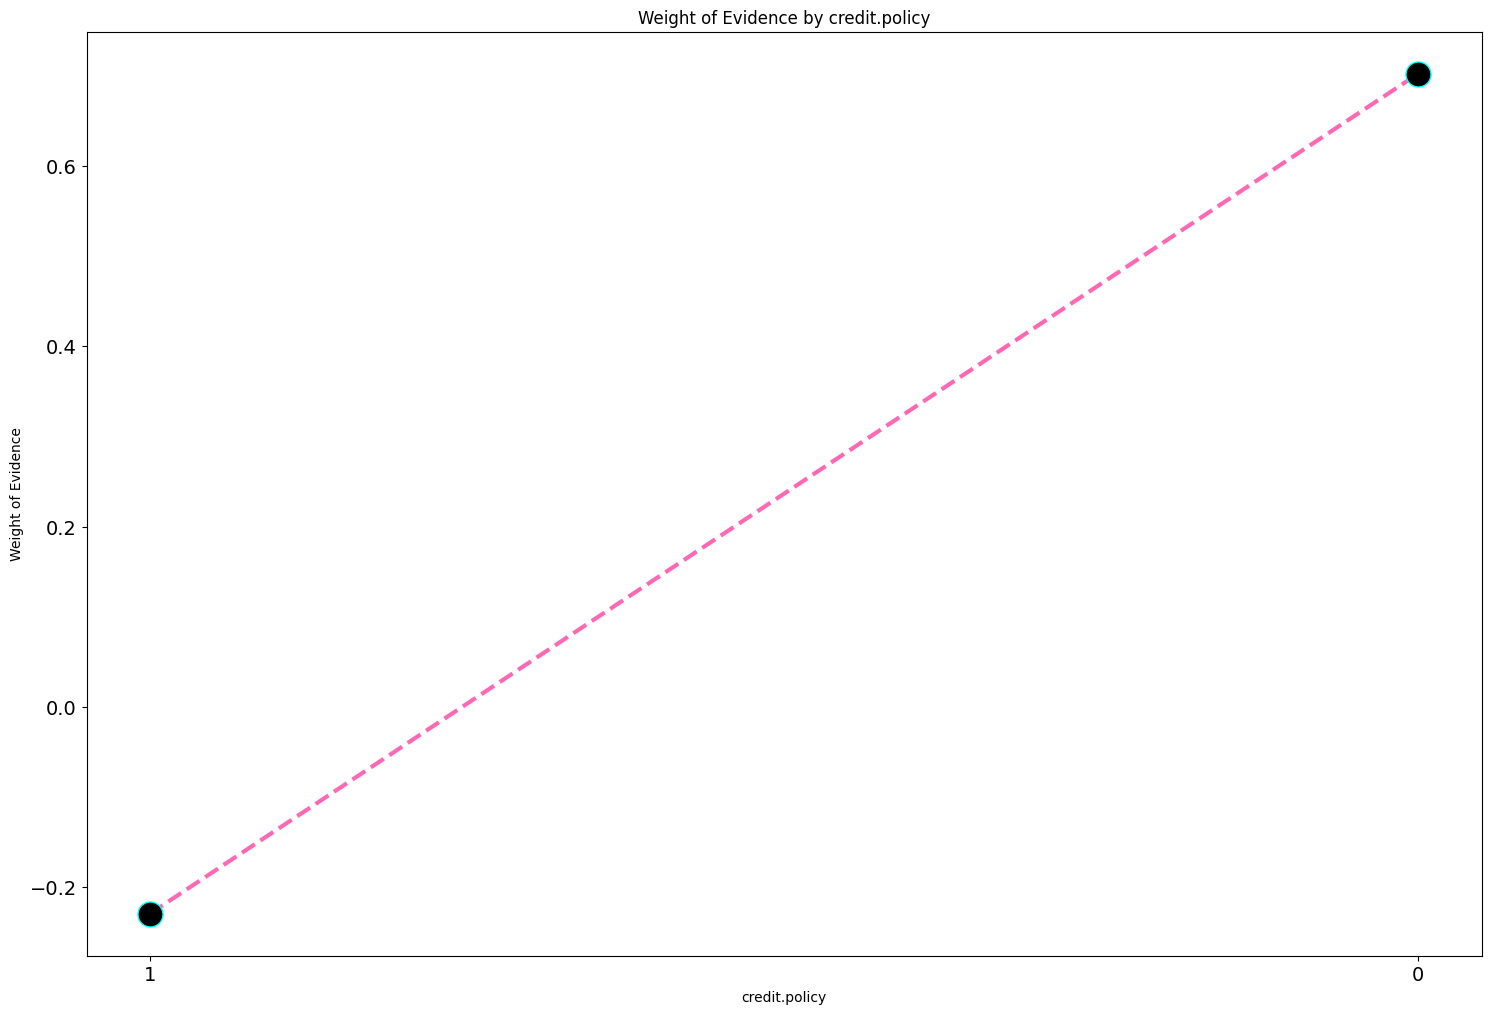

In [32]:
woe_result= woe_categorical(X, 'credit.policy', y)
plot_by_woe(woe_result)

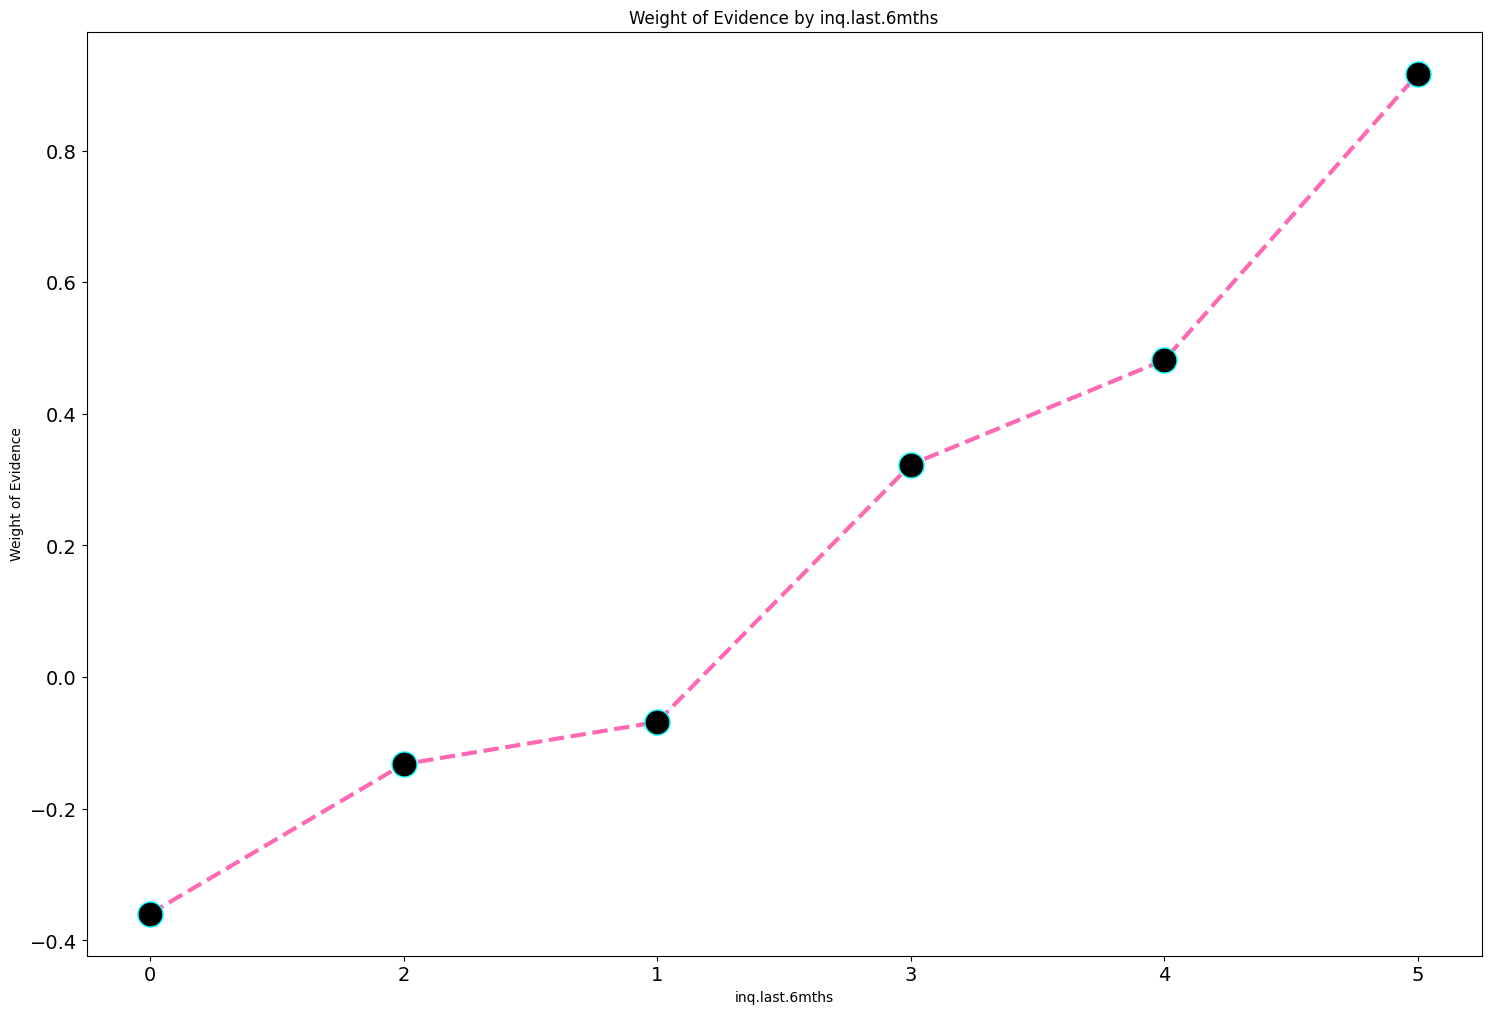

In [33]:
woe_result= woe_categorical(X, 'inq.last.6mths', y)
#woe_result
plot_by_woe(woe_result)

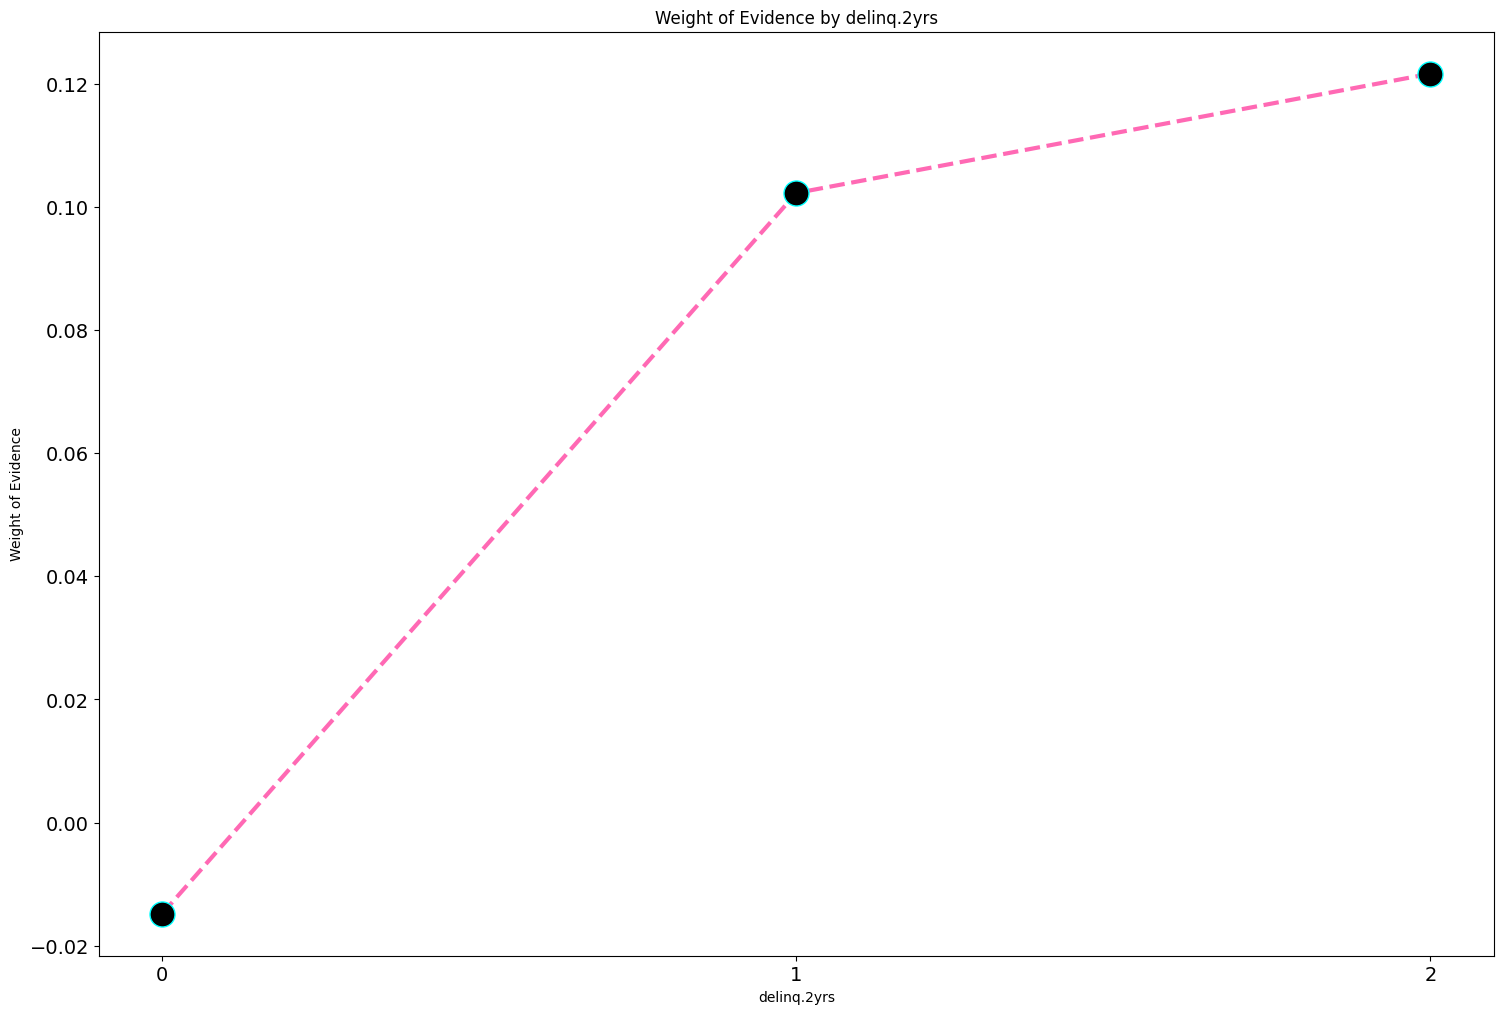

In [34]:
woe_result= woe_categorical(X, 'delinq.2yrs', y)
#woe_result
plot_by_woe(woe_result)

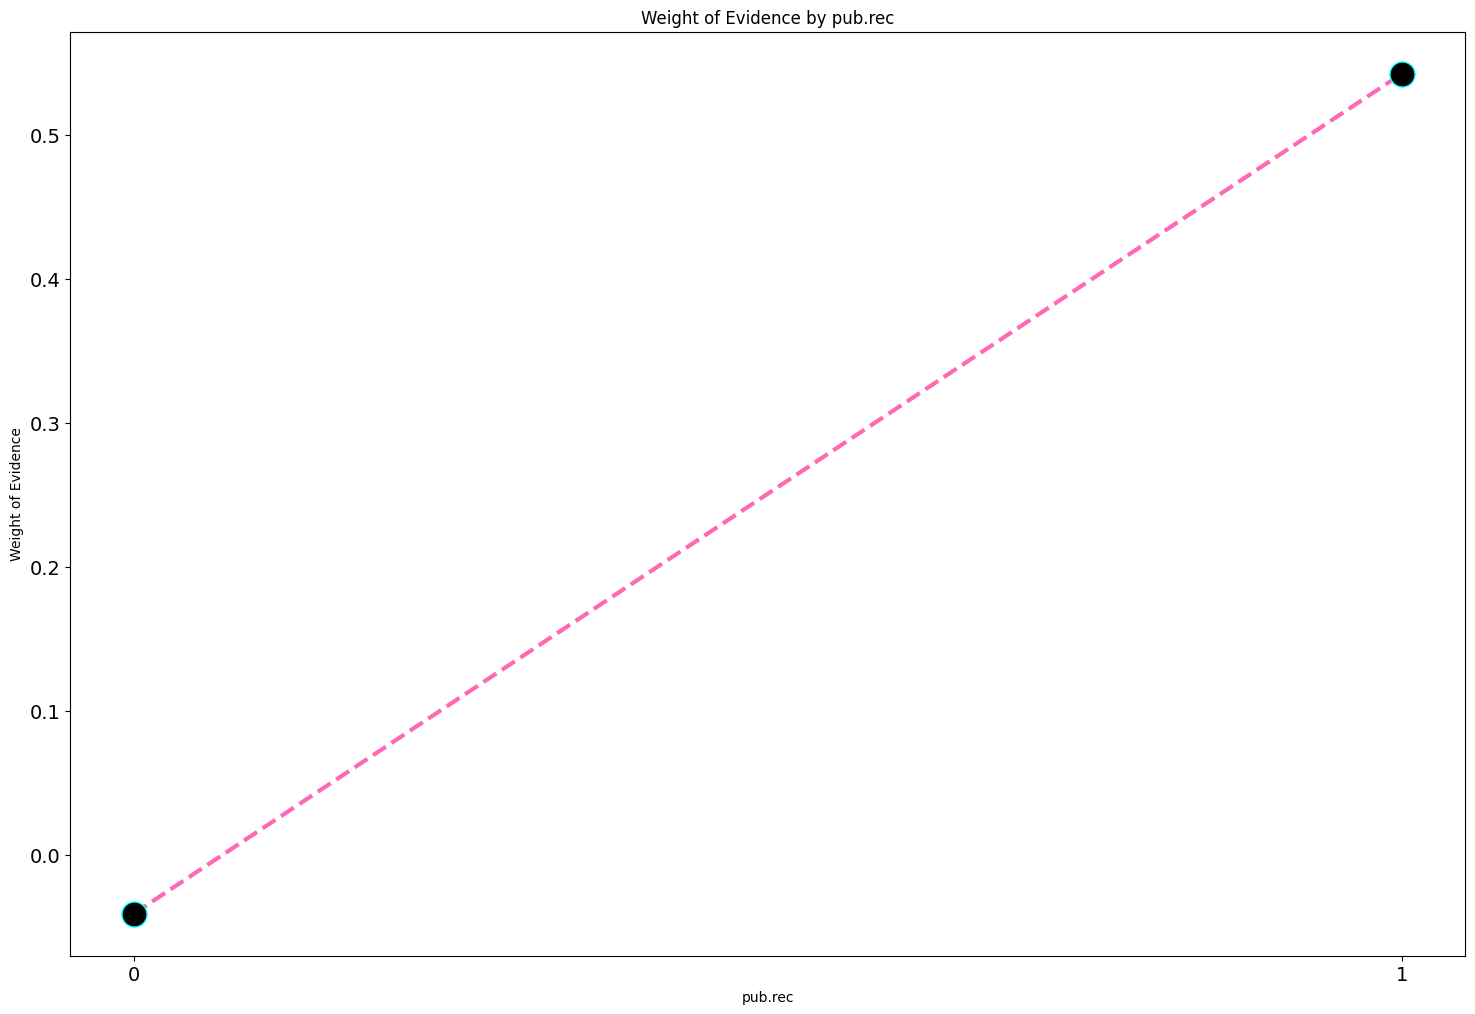

In [35]:
woe_result= woe_categorical(X, 'pub.rec', y)
plot_by_woe(woe_result)

In [36]:
num_data_features

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'not.fully.paid'],
      dtype='object')

In [37]:
#manual_bins = [0.059999, 0.07,  0.1284, 0.1379, 0.1505, 0.2164]
manual_bins = [0.059999,0.0894, 0.1183, 0.1284, 0.1379, 0.1505, 0.2164]
#result_auto= woe_continous(X,'int.rate', y, num_bins=7)
woe_result= woe_manual_bins(X,'int.rate', y, manual_bins)
# print(result_auto['bins'].unique())
# print('\n')
# print(woe_result['bins'].unique())
woe_result

C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\1025120985.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\1025120985.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)


,bins,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.059999, 0.0894]",1442,0.054092,0.150553,78.0,1364.0,0.050881,0.169546,-1.203644,NaN,NaN,0.218664
1,"(0.0894, 0.1183]",2667,0.137608,0.278451,367.0,2300.0,0.239400,0.285892,-0.177478,0.083516,1.026165,0.218664
2,"(0.1183, 0.1284]",1481,0.164754,0.154625,244.0,1237.0,0.159165,0.153760,0.034548,0.027146,0.212026,0.218664
3,"(0.1284, 0.1379]",1334,0.179910,0.139278,240.0,1094.0,0.156556,0.135985,0.140867,0.015157,0.106319,0.218664
4,"(0.1379, 0.1505]",1333,0.208552,0.139173,278.0,1055.0,0.181344,0.131137,0.324149,0.028642,0.183282,0.218664
5,"(0.1505, 0.2164]",1321,0.246783,0.137920,326.0,995.0,0.212655,0.123679,0.541979,0.038231,0.217830,0.218664


In [38]:
woe_result= woe_continous(X,'installment', y)
woe_result

C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)


,bins,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(15.669999, 102.71]",1200,0.151667,0.125287,182.0,1018.0,0.118721,0.126538,-0.063764,NaN,NaN,0.01842
1,"(102.71, 163.77]",1199,0.130942,0.125183,157.0,1042.0,0.102414,0.129521,-0.234827,0.020724,0.171063,0.01842
2,"(163.77, 206.31875]",1193,0.158424,0.124556,189.0,1004.0,0.123288,0.124798,-0.012176,0.027482,0.222651,0.01842
3,"(206.31875, 268.95]",1207,0.154930,0.126018,187.0,1020.0,0.121983,0.126787,-0.038625,0.003495,0.026449,0.01842
4,"(268.95, 334.38125]",1187,0.154170,0.123930,183.0,1004.0,0.119374,0.124798,-0.044437,0.000759,0.005812,0.01842
5,"(334.38125, 432.7625]",1197,0.158730,0.124974,190.0,1007.0,0.123940,0.125171,-0.009883,0.004560,0.034554,0.01842
6,"(432.7625, 588.29625]",1197,0.171261,0.124974,205.0,992.0,0.133725,0.123306,0.081111,0.012531,0.090994,0.01842
7,"(588.29625, 940.14]",1198,0.200334,0.125078,240.0,958.0,0.156556,0.119080,0.273615,0.029072,0.192504,0.01842


C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)


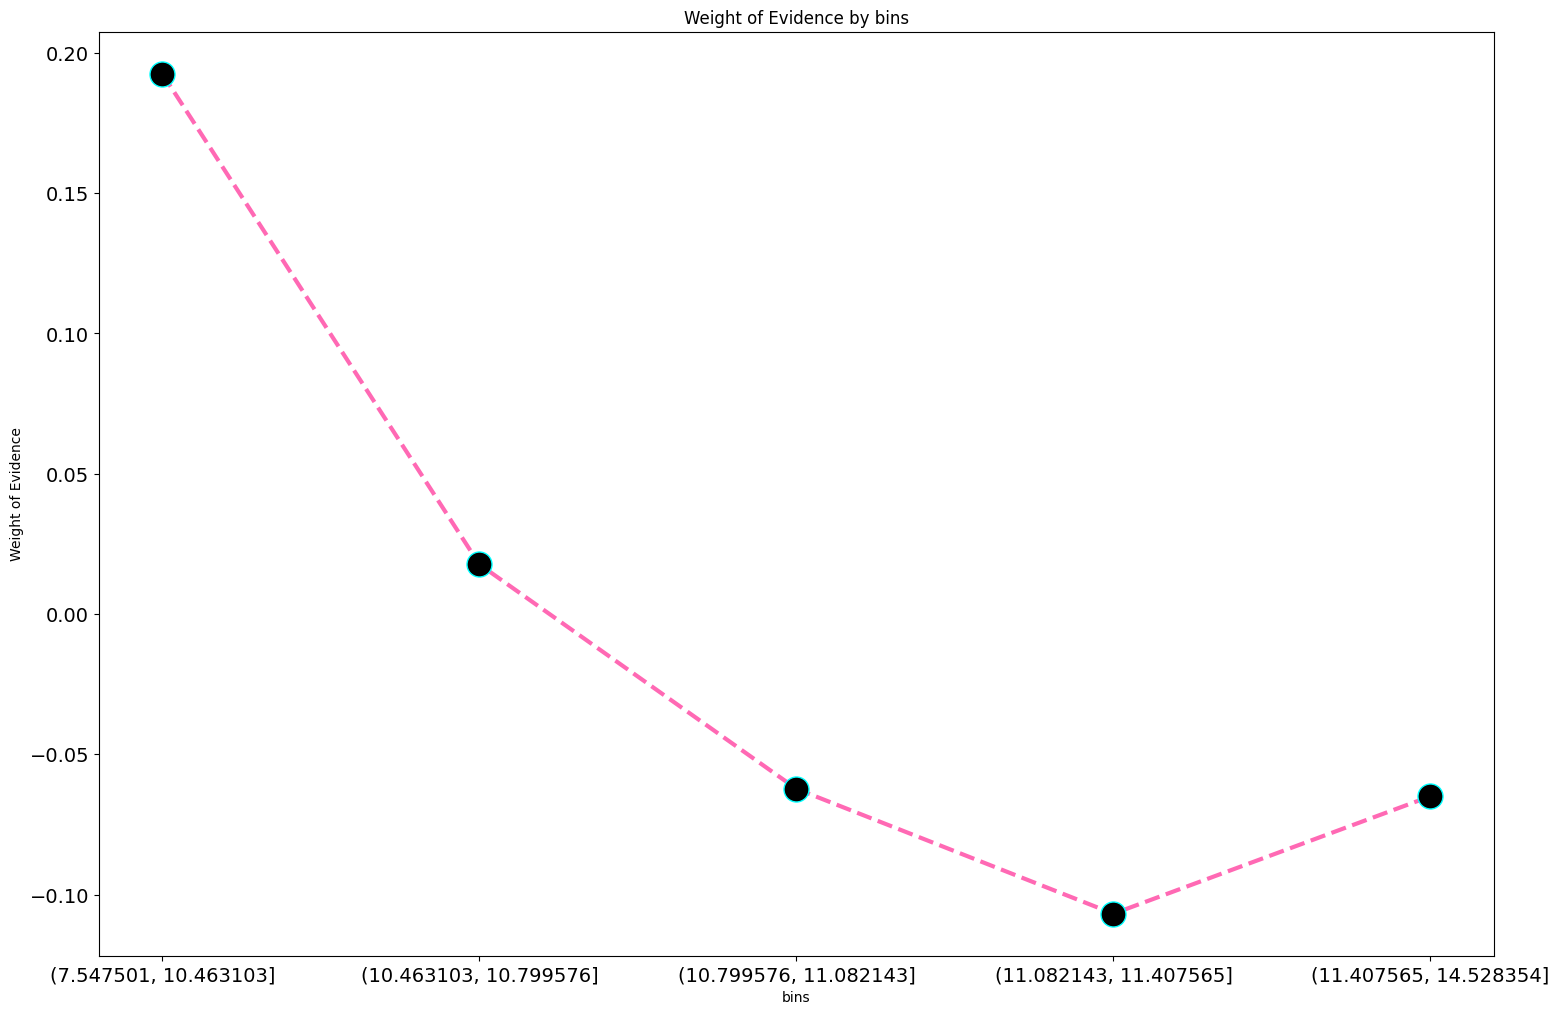

In [39]:
woe_result= woe_continous(X,'log.annual.inc', y, num_bins=5 )
plot_by_woe(woe_result)

C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)


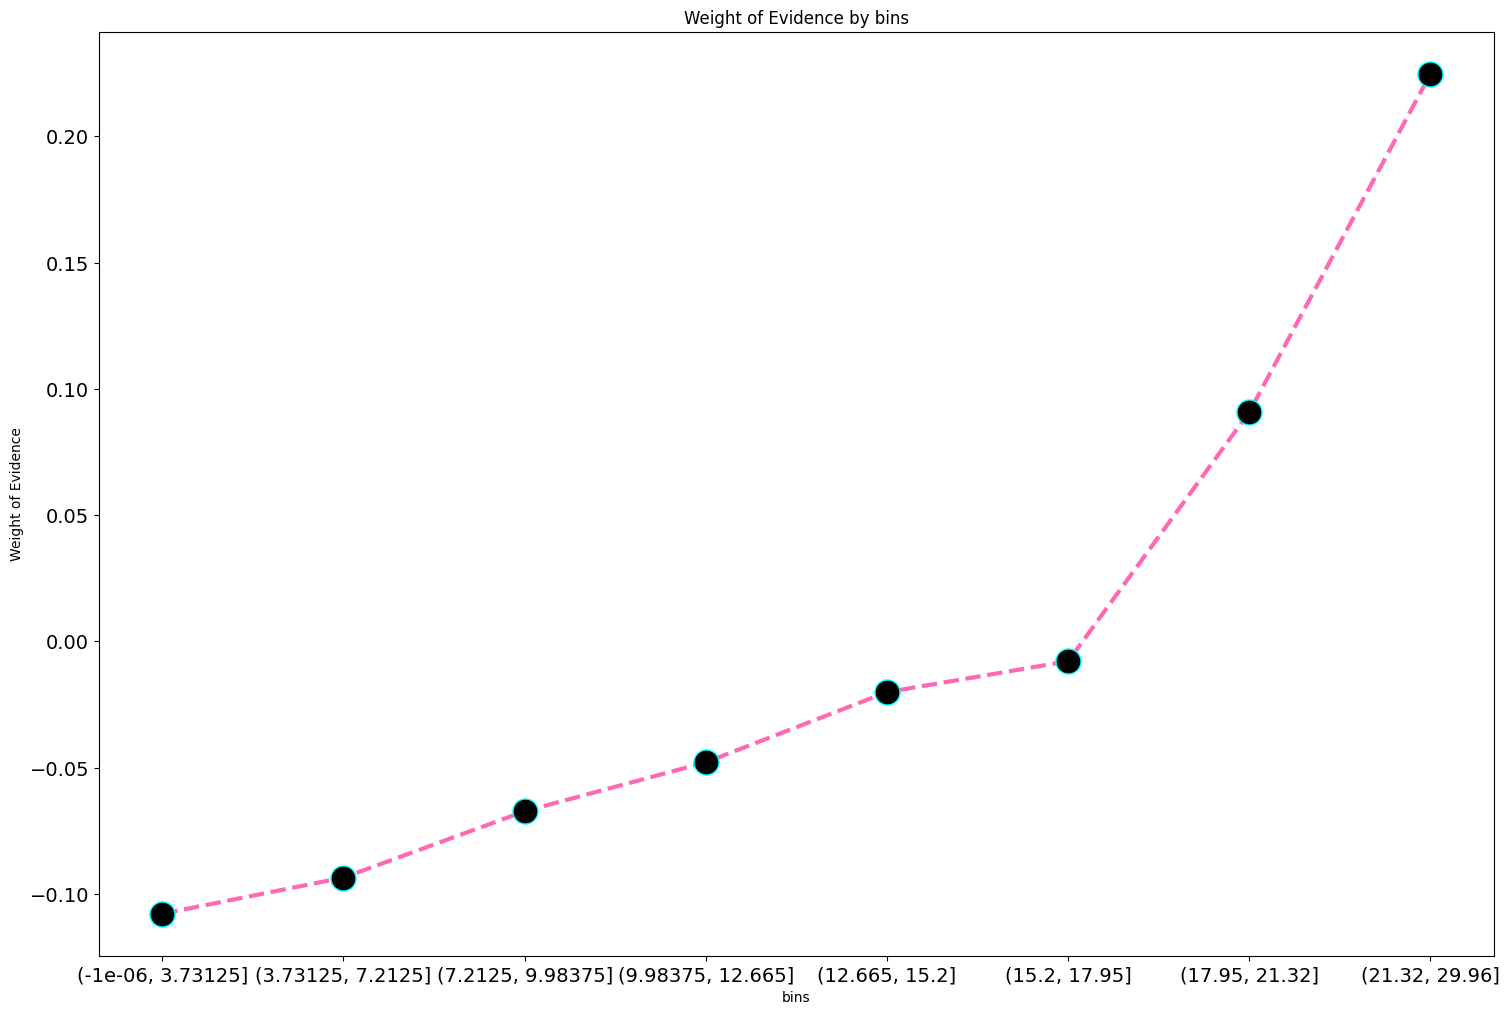

In [40]:
woe_result= woe_continous(X,'dti', y, num_bins=8 )
plot_by_woe(woe_result)

C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)


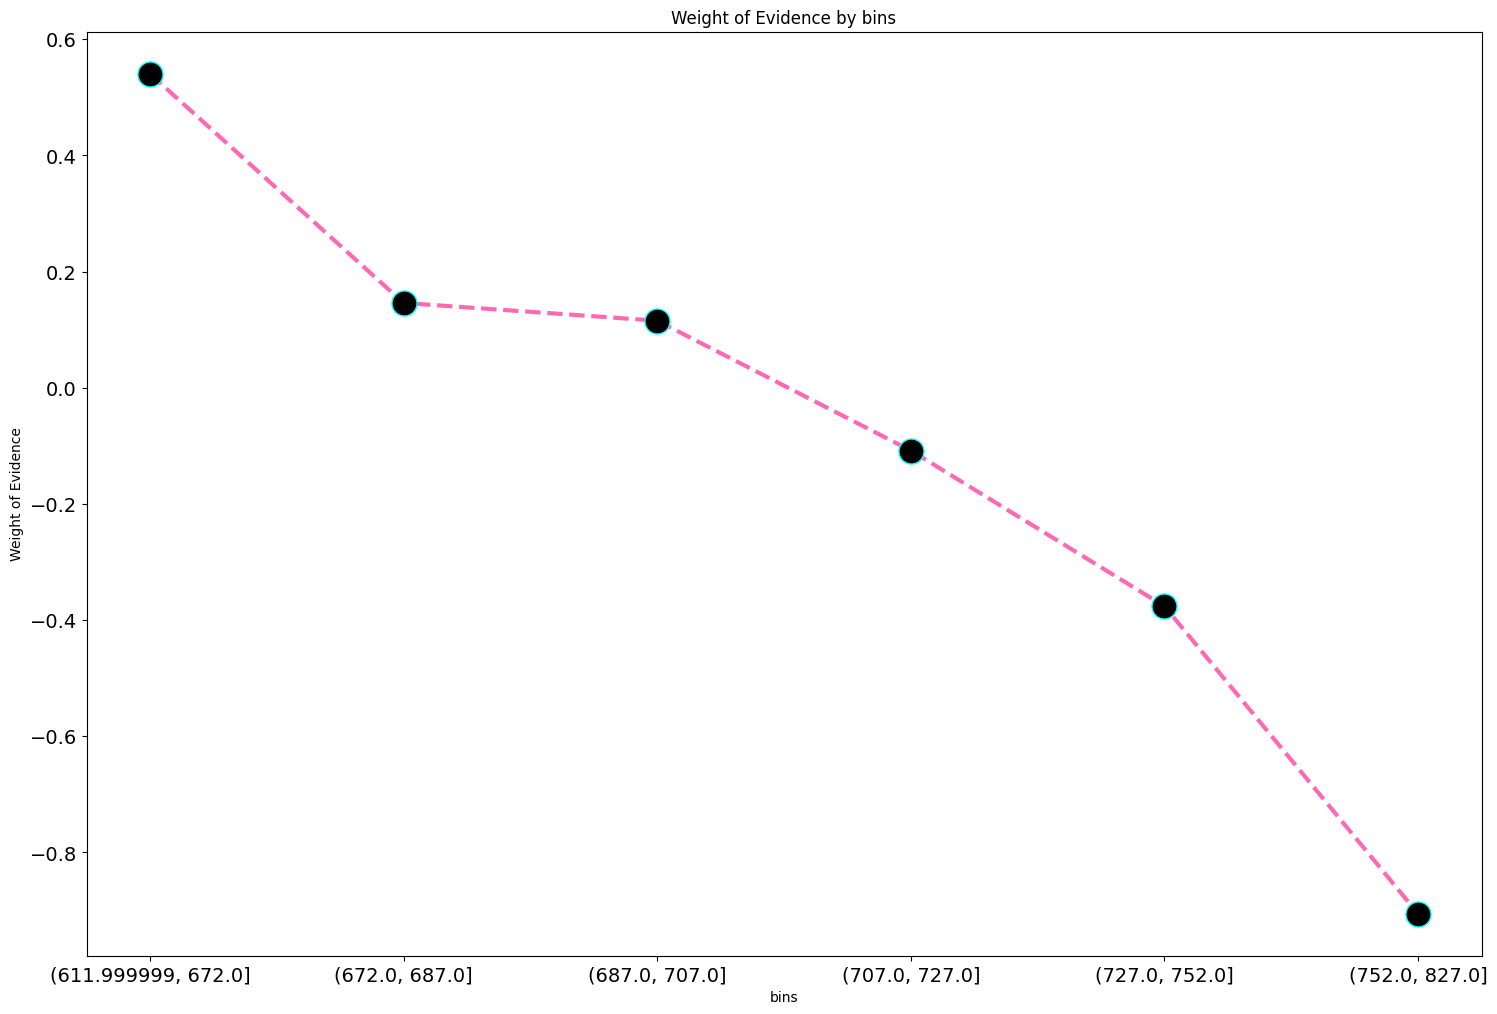

In [41]:
woe_result= woe_continous(X,'fico', y, num_bins=6 )
plot_by_woe(woe_result)

C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)


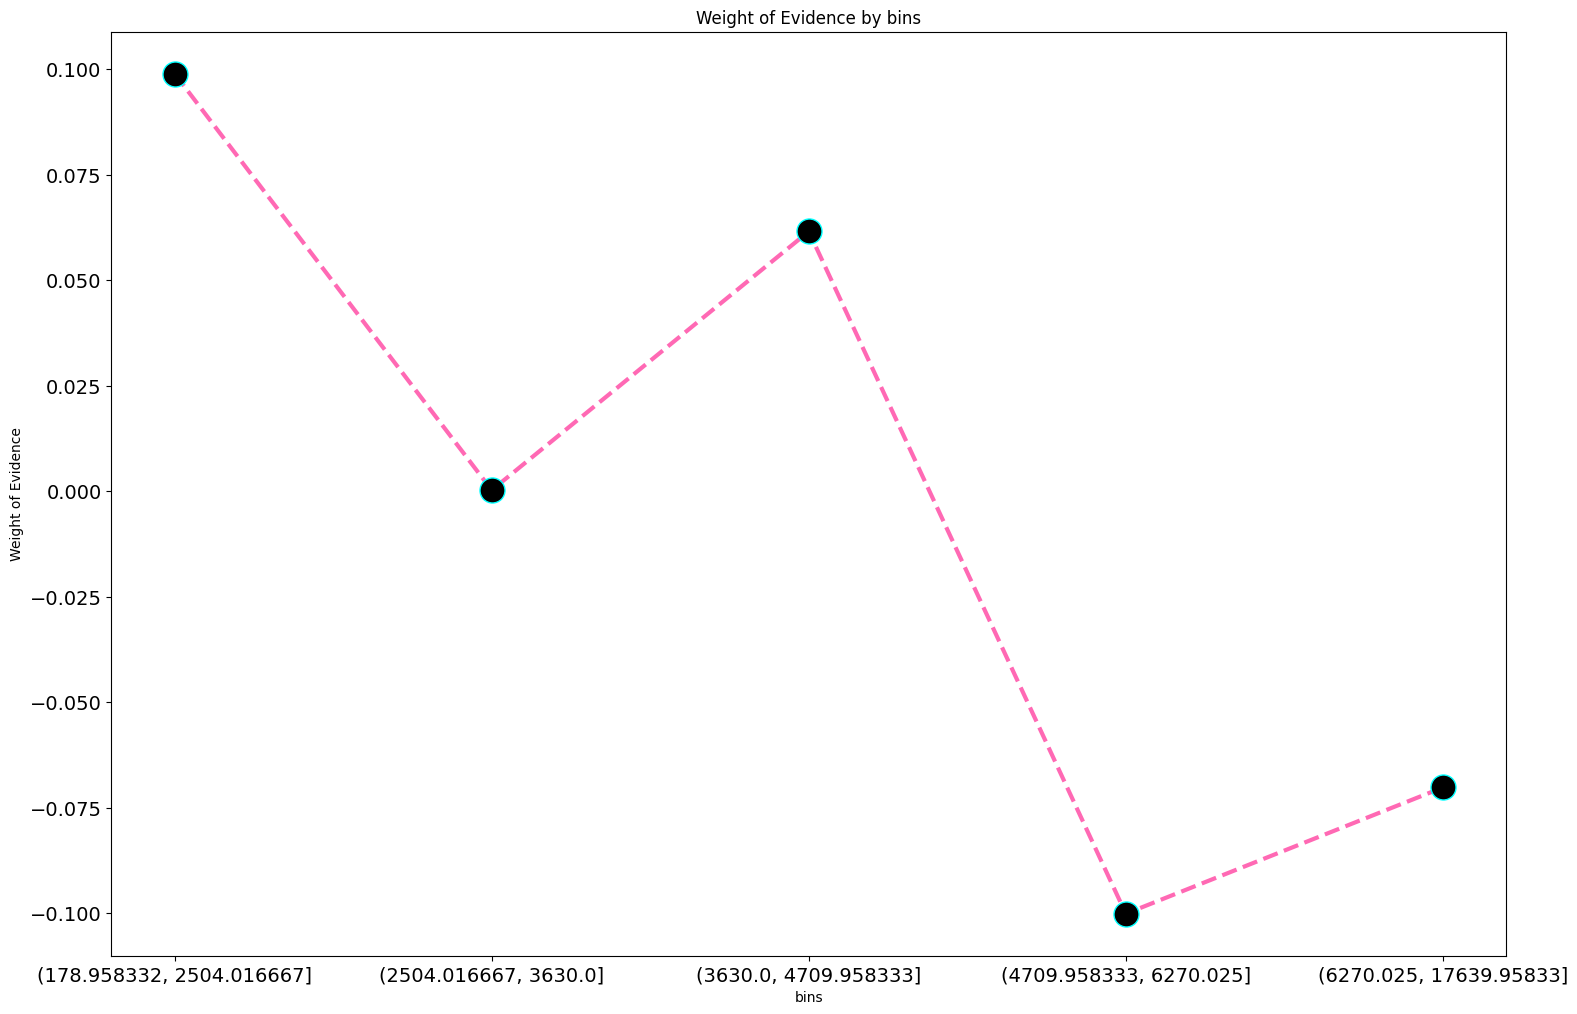

In [42]:
woe_result= woe_continous(X,'days.with.cr.line', y, num_bins=5 )
plot_by_woe(woe_result)

C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)


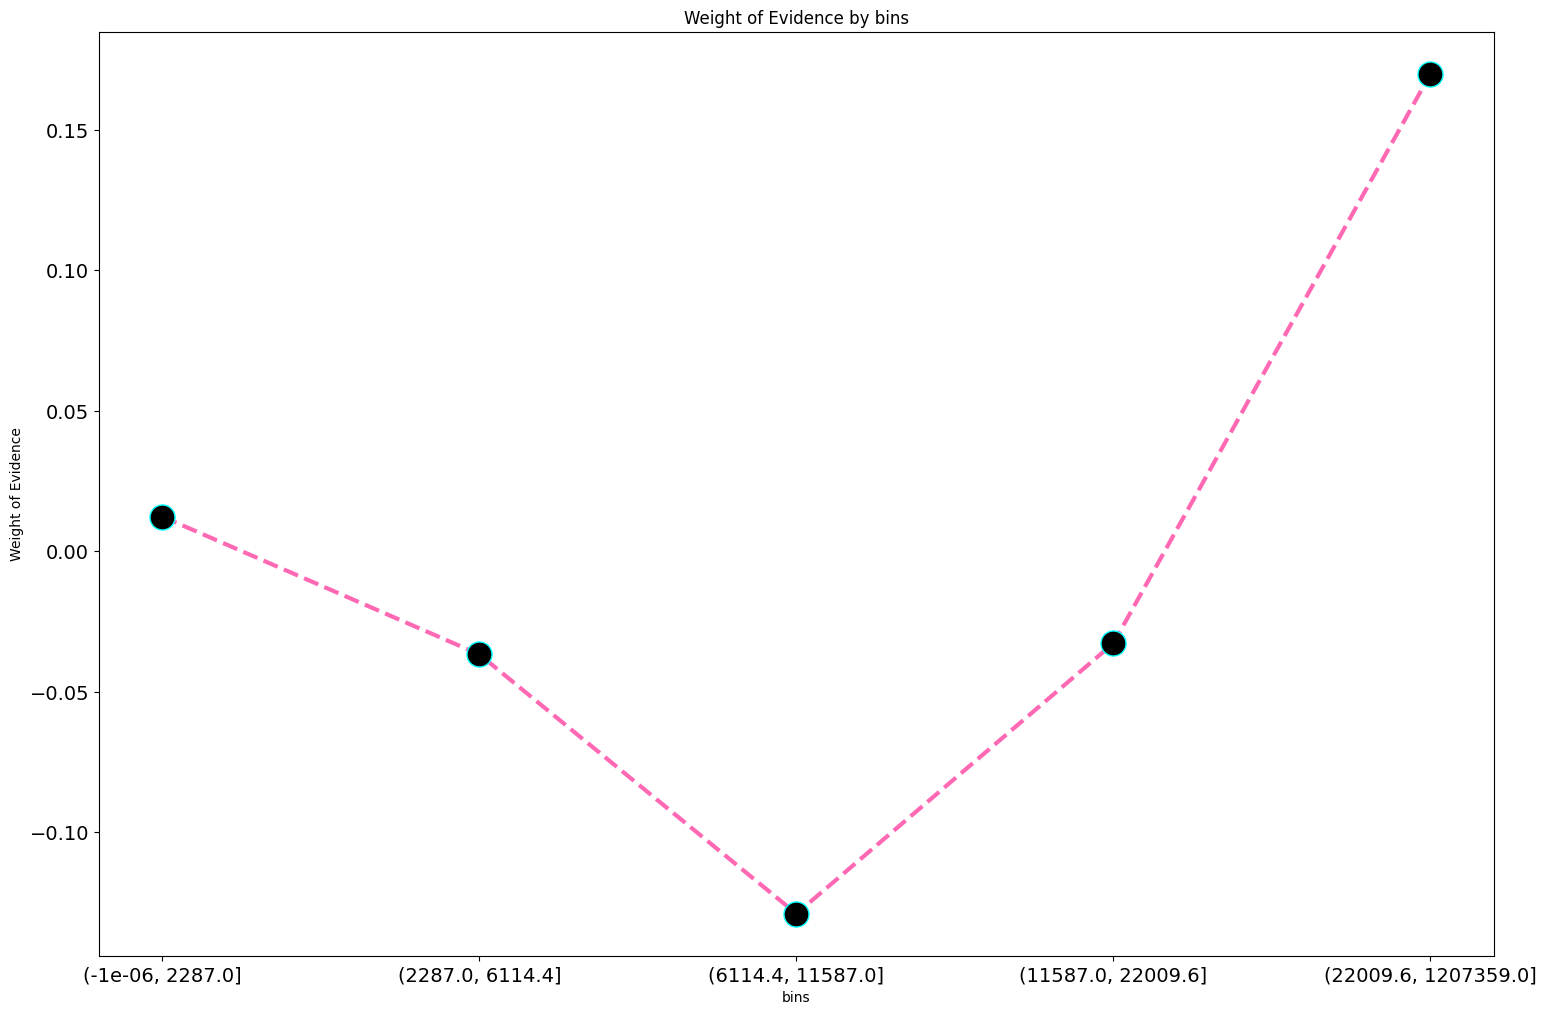

In [43]:
woe_result= woe_continous(X,'revol.bal', y, num_bins=5 )
plot_by_woe(woe_result)

C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby('bins', as_index=False)[df.columns.values[1]].count(),
C:\Users\Aryan_Gupta\AppData\Local\Temp\ipykernel_28512\2918523944.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bins', as_index=False)[df.columns.values[1]].mean()], axis=1)


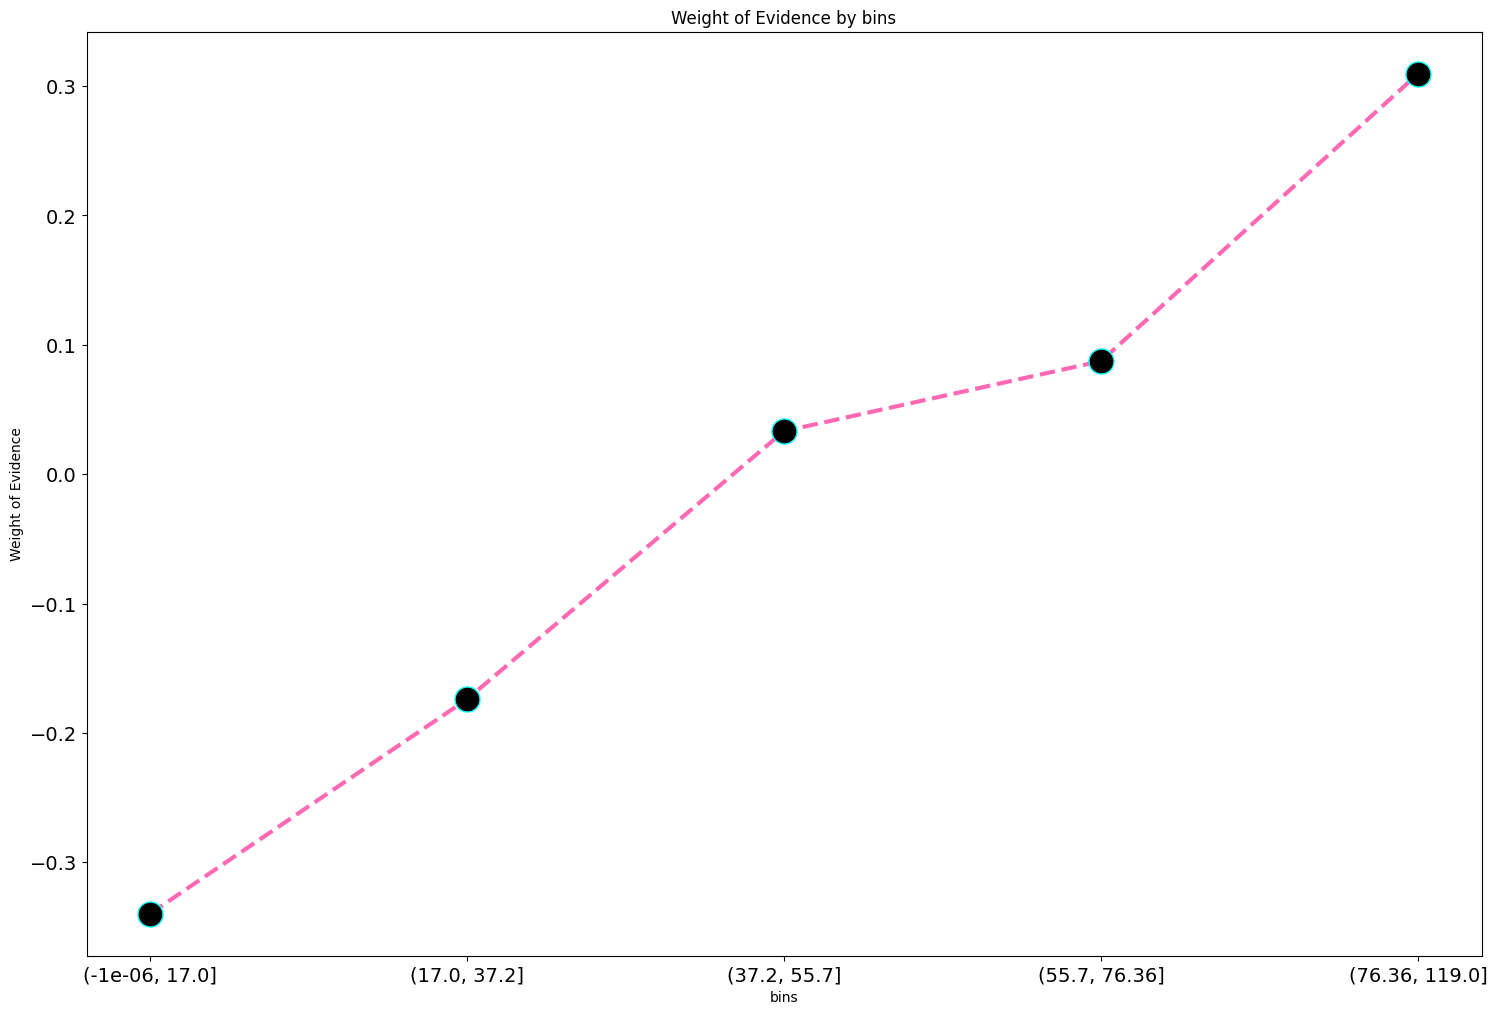

In [44]:
woe_result= woe_continous(X,'revol.util', y, num_bins=5 )
plot_by_woe(woe_result)

In [45]:
global_iv

{'purpose': 0.06809951585017848,
 'credit.policy': 0.15931796327368264,
 'inq.last.6mths': 0.15836594520715752,
 'delinq.2yrs': 0.001595005061373719,
 'pub.rec': 0.021973686105680144,
 'int.rate': 0.21866427008272174,
 'installment': 0.01842017491871681,
 'log.annual.inc': 0.011837178348238855,
 'dti': 0.01121216074036473,
 'fico': 0.17801634736319638,
 'days.with.cr.line': 0.005691063189217103,
 'revol.bal': 0.009814675340547108,
 'revol.util': 0.049284522185223265}

In [46]:
sorted_iv = dict(sorted(global_iv.items(), key=lambda item: item[1]))
sorted_iv

{'delinq.2yrs': 0.001595005061373719,
 'days.with.cr.line': 0.005691063189217103,
 'revol.bal': 0.009814675340547108,
 'dti': 0.01121216074036473,
 'log.annual.inc': 0.011837178348238855,
 'installment': 0.01842017491871681,
 'pub.rec': 0.021973686105680144,
 'revol.util': 0.049284522185223265,
 'purpose': 0.06809951585017848,
 'inq.last.6mths': 0.15836594520715752,
 'credit.policy': 0.15931796327368264,
 'fico': 0.17801634736319638,
 'int.rate': 0.21866427008272174}

In [70]:
df_bin_to_woe

,features,bin,WoE
0,purpose,5,-0.411361
1,purpose,1,-0.376075
2,purpose,2,-0.058168
3,purpose,0,0.043746
4,purpose,4,0.072985
5,purpose,3,0.278803
6,purpose,6,0.702760
0,credit.policy,1,-0.229783
1,credit.policy,0,0.702609
0,inq.last.6mths,0,-0.359418


In [48]:
global_woe_df.head()

,purpose,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,-0.058168,-0.229783,-0.359418,-0.014796,-0.040583,0.034548,0.273615,-0.106807,0.090820,-0.376224,-0.100156,0.169930,0.033263
1,-0.376075,-0.229783,-0.359418,-0.014796,-0.040583,-0.177478,-0.038625,-0.062298,-0.020113,0.115450,0.000215,0.169930,0.309587
2,-0.058168,-0.229783,-0.068201,-0.014796,-0.040583,0.140867,-0.009883,0.192541,-0.047912,0.146044,-0.100156,-0.036772,-0.174002
3,-0.058168,-0.229783,-0.068201,-0.014796,-0.040583,-0.177478,-0.234827,-0.106807,-0.067307,-0.108132,0.000215,0.169930,0.087437
4,-0.376075,-0.229783,-0.359418,0.102224,-0.040583,0.324149,-0.234827,-0.106807,-0.020113,0.540693,0.061516,-0.036772,0.033263


In [49]:
max_values = global_woe_df.max()

# Calculate minimum values for each column
min_values = global_woe_df.min()

# Display the results
print("Maximum values:")
print(max_values)

print("\nMinimum values:")
print(min_values)

Maximum values:
purpose              0.702760
credit.policy        0.702609
inq.last.6mths       0.916668
delinq.2yrs          0.121590
pub.rec              0.542445
int.rate             0.541979
installment          0.273615
log.annual.inc       0.192541
dti                  0.224812
fico                 0.540693
days.with.cr.line    0.098890
revol.bal            0.169930
revol.util           0.309587
dtype: float64

Minimum values:
purpose             -0.411361
credit.policy       -0.229783
inq.last.6mths      -0.359418
delinq.2yrs         -0.014796
pub.rec             -0.040583
int.rate            -1.203644
installment         -0.234827
log.annual.inc      -0.106807
dti                 -0.107885
fico                -0.905601
days.with.cr.line   -0.100156
revol.bal           -0.129075
revol.util          -0.339753
dtype: float64


The above DataFrame id formed by replacing all data values by corresponding WoE values. The dataframe doesn't contain any NULL or NaN values, but it does contain certain INF and -INF values, which need to be capped for them to inputted into logistic regression function.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame and 'target_column' is the column you want to predict
X_new= global_woe_df
y_new= y

# X_new= X
# y_new= y

min_value = -1e9
max_value = 1e9

# Clip the values in the DataFrame to the specified range
X_capped = X_new.apply(lambda x: np.clip(x, min_value, max_value))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_capped, y_new, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8418580375782881
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.62      0.02      0.03       305

    accuracy                           0.84      1916
   macro avg       0.73      0.51      0.47      1916
weighted avg       0.81      0.84      0.77      1916



Let’s look at the AUC of the model. Industry experience is that a model with a score above 0.80 is considered a model that can be put into production lines.

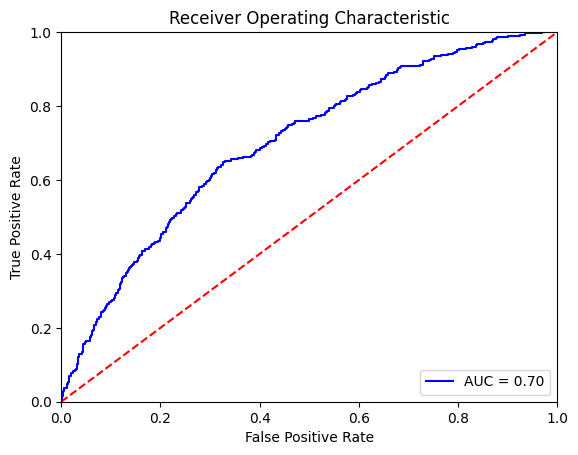

In [51]:

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
model.coef_


array([[ 0.86806504,  0.28457632,  0.64505595, -0.46507896,  0.61385273,
         0.31161154,  1.01321139,  1.29333011,  0.20509706,  0.47717202,
         0.23716497,  0.8913996 ,  0.27536311]])

In [53]:
min_value = -1e9
max_value = 1e9

# Clip the values in the 'IV' column to the specified range
df_bin_to_woe['WoE'] = np.clip(df_bin_to_woe['WoE'], min_value, max_value)
A = 650
#B =72.13
B= 150
feature_cols= ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util','inq.last.6mths', 'delinq.2yrs','pub.rec']

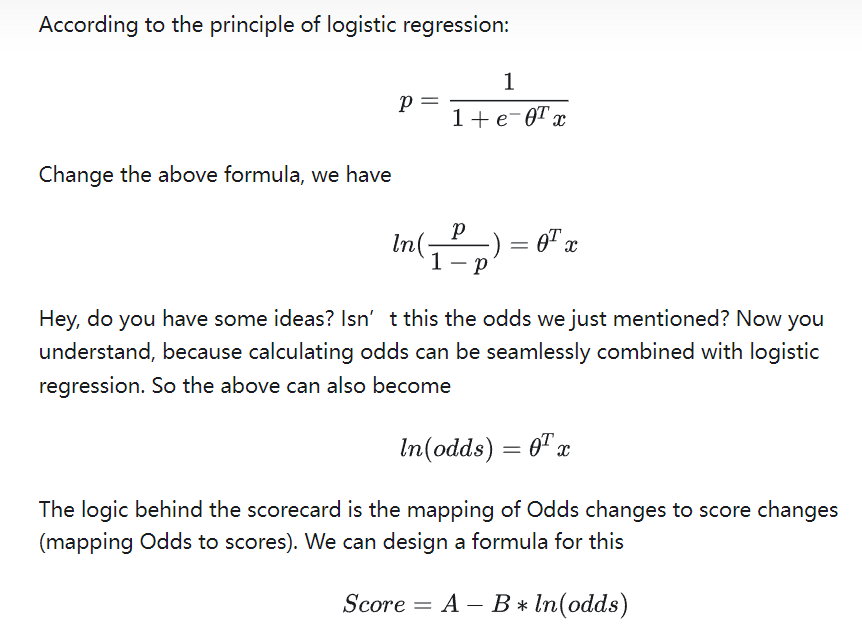

In [54]:
def generate_scorecard(model_coef,binning_df,features,B):
    lst = []
    cols = ['Variable','Binning','Score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(-coef[i]*row['WoE']*B))])
    data = pd.DataFrame(lst, columns=cols)
    return data

In [55]:
score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)
score_card

,Variable,Binning,Score
0,credit.policy,1,30
1,credit.policy,0,-91
2,purpose,5,18
3,purpose,1,16
4,purpose,2,2
5,purpose,0,-2
6,purpose,4,-3
7,purpose,3,-12
8,purpose,6,-30
9,int.rate,"(0.059999, 0.0894]",116


In [56]:
sort_scorecard = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_scorecard

Variable                    Binning  Score
Variable                                                                 
credit.policy     0       credit.policy                          1     30
                  1       credit.policy                          0    -91
days.with.cr.line 45  days.with.cr.line    (4709.958333, 6270.025]     19
                  46  days.with.cr.line    (6270.025, 17639.95833]     14
                  43  days.with.cr.line      (2504.016667, 3630.0]      0
                  44  days.with.cr.line      (3630.0, 4709.958333]    -12
                  42  days.with.cr.line  (178.958332, 2504.016667]    -19
delinq.2yrs       63        delinq.2yrs                          0      2
                  64        delinq.2yrs                          1    -14
                  65        delinq.2yrs                          2    -16
dti               28                dti          (-1e-06, 3.73125]      5
                  29                dti          (3.73125, 7.2125]      4
                  30                dti          (7.2125, 9.98375]      3
                  31                dti          (9.98375, 12.665]      2
                  32                dti             (12.665, 15.2]      1
                  33                dti              (15.2, 17.95]      0
                  34                dti             (17.95, 21.32]     -4
                  35                dti             (21.32, 29.96]    -11
fico              41               fico             (752.0, 827.0]    138
                  40               fico             (727.0, 752.0]     57
                  39               fico             (707.0, 727.0]     16
                  38               fico             (687.0, 707.0]    -18
                  37               fico             (672.0, 687.0]    -22
                  36               fico        (611.999999, 672.0]    -82
inq.last.6mths    57     inq.last.6mths                          0     13
                  58     inq.last.6mths                          2      5
                  59     inq.last.6mths                          1      2
                  60     inq.last.6mths                          3    -11
                  61     inq.last.6mths                          4    -17
                  62     inq.last.6mths                          5    -33
installment       22        installment        (588.29625, 940.14]     19
                  21        installment      (432.7625, 588.29625]      6
                  17        installment        (163.77, 206.31875]     -1
                  20        installment      (334.38125, 432.7625]     -1
                  18        installment        (206.31875, 268.95]     -3
                  19        installment        (268.95, 334.38125]     -3
                  15        installment        (15.669999, 102.71]     -4
                  16        installment           (102.71, 163.77]    -16
int.rate          9            int.rate         (0.059999, 0.0894]    116
                  10           int.rate           (0.0894, 0.1183]     17
                  11           int.rate           (0.1183, 0.1284]     -3
                  12           int.rate           (0.1284, 0.1379]    -14
                  13           int.rate           (0.1379, 0.1505]    -31
                  14           int.rate           (0.1505, 0.2164]    -52
log.annual.inc    26     log.annual.inc     (11.082143, 11.407565]     10
                  25     log.annual.inc     (10.799576, 11.082143]      6
                  27     log.annual.inc     (11.407565, 14.528354]      6
                  24     log.annual.inc     (10.463103, 10.799576]     -2
                  23     log.annual.inc      (7.547501, 10.463103]    -18
pub.rec           66            pub.rec                          0      2
                  67            pub.rec                          1    -22
purpose           2             purpose                          5     18
                  3             pur

In [57]:
# def str_to_int(s):
#     if s == '-inf':
#         return -999999999.0
#     elif s=='inf':
#         return 999999999.0
#     else:
#         return float(s)

def str_to_int(s):
    if s == '-inf':
        return -999999999.0
    elif s == 'inf':
        return 999999999.0
    elif s == '':
        return 0.0  # Handle empty strings, you can modify this based on your requirements
    else:
        try:
            return float(s)
        except ValueError:
            return 0.0  # Handle non-numeric values by returning a default value or modify as needed
    
def map_value_to_bin(feature_value,feature_to_bin):
    for idx, row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0]=="("
        right_open = bins[-1]==")"
        binnings = bins[1:-1].split(',')
        in_range = True
        # check left bound
        if left_open:
            if feature_value<= str_to_int(binnings[0]):
                in_range = False   
        else:
            if feature_value< str_to_int(binnings[0]):
                in_range = False   
        #check right bound
        if right_open:
            if feature_value>= str_to_int(binnings[1]):
                in_range = False 
        else:
            if feature_value> str_to_int(binnings[1]):
                in_range = False   
        if in_range:
            return row['Binning']
    return 0

def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        if col in num_data:
            feature_to_bin = score_card[score_card['Variable']==col]
            feature_value = df[col]
            selected_bin = map_value_to_bin(feature_value,feature_to_bin)
            selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning'] == selected_bin]
            score += selected_record_in_scorecard['Score'].iloc[0]
        else:
            feature_to_bin = score_card[score_card['Variable']==col]
            feature_value = df[col]
            selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning'] == feature_value]
            score += selected_record_in_scorecard['Score'].iloc[0]
            
            
    return score  

def calculate_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] = df['score']+A
    df['score'] = df['score'].astype(int)
    return df
        

In [58]:
good_sample = df[df['not.fully.paid']==0].sample(5, random_state=1)
good_sample = good_sample[feature_cols]
bad_sample = df[df['not.fully.paid']==1].sample(5, random_state=1)
bad_sample = bad_sample[feature_cols]

In [59]:
calculate_score_with_card(good_sample,score_card,A)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,score
693,1,2,0.1229,633.71,11.561716,10.01,687,5250.041667,19368,38.6,1,2,0,690
7138,1,2,0.1025,404.81,11.050890,11.77,732,5250.041667,3427,16.2,1,0,0,813
115,1,3,0.1059,195.27,9.852194,8.15,692,3089.958333,8528,86.1,0,0,0,650
4564,1,0,0.0774,78.05,10.645425,6.49,737,6359.958333,967,10.1,1,0,0,893
3912,1,2,0.1095,196.29,10.043249,8.82,742,7320.000000,591,29.5,0,0,0,783


In [60]:
calculate_score_with_card(bad_sample,score_card,A)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,score
340,1,2,0.1267,536.57,11.420810,10.13,677,5280.041667,23129,79.8,0,1,0,664
7908,0,4,0.1028,294.83,10.434116,10.66,687,599.958333,1521,27.7,5,0,0,496
1673,1,2,0.1146,230.70,10.819858,8.74,692,1890.041667,20248,27.7,0,0,0,698
636,1,5,0.1608,879.92,10.714418,6.40,667,5160.000000,12704,54.1,0,2,0,602
6447,1,6,0.1670,541.40,10.242813,13.16,747,1140.000000,29,0.3,2,0,0,658
